Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

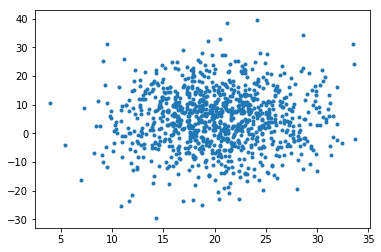

In [52]:
mu1 = 20
sigma1 = 5

mu2 = 5 
sigma2 = 10

amount = 1000

norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Нарисовать плотность распределения полученной выборки x.

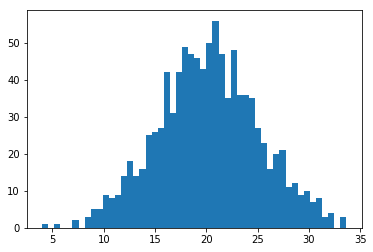

In [53]:
plt.hist(x,50)
plt.show()

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

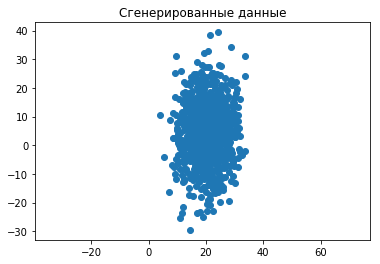

In [54]:
X = np.vstack((x, y)).T
plt.scatter(X[:, 0], X[:, 1])
plt.title('Сгенерированные данные')
plt.axis('equal'); #что означает эта строка?

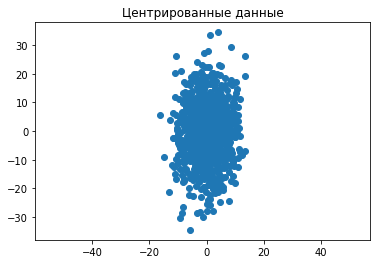

In [55]:
# центрирование переменных x, y
X_center = X - np.mean(X, 0)

plt.scatter(X_center[:, 0], X_center[:, 1])
plt.title('Центрированные данные')
plt.axis('equal');

(-88.56391096931515, 74.64715572527389, -189.4759651877514, 189.70350333742522)

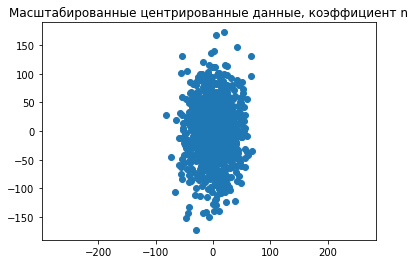

In [56]:
# Матрица масштабирования
n = 5
sx, sy = n, n
Scale = np.array([[sx, 0], [0, sy]])

# Умножаем матрицу на исходную матрицу
X_scaled = X_center.dot(Scale)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title('Масштабированные центрированные данные, коэффициент n')
plt.axis('equal')

(12.513792705013561,
 175.7248593996026,
 -164.82990449754683,
 214.34956402762978)

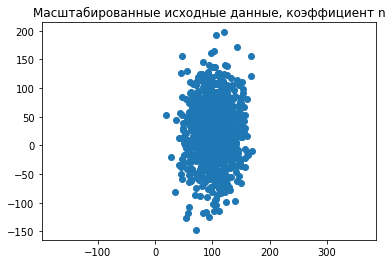

In [57]:
#зачем центрировать, если и без него данные масштабируются?
# Матрица масштабирования
n = 5
sx, sy = n, n
Scale = np.array([[sx, 0], [0, sy]])

# Умножаем матрицу на исходную матрицу
X_scaled1 = X.dot(Scale)

plt.scatter(X_scaled1[:, 0], X_scaled1[:, 1])
plt.title('Масштабированные исходные данные, коэффициент n')
plt.axis('equal')

Построить график зависимости (корелляции) x от y.

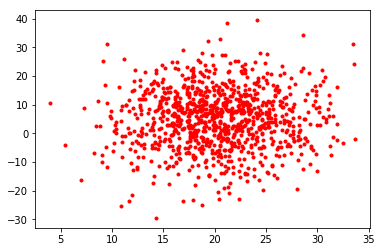

In [58]:
plt.plot(x, y, 'r.')
#точечный график не показывает наличие корреляции

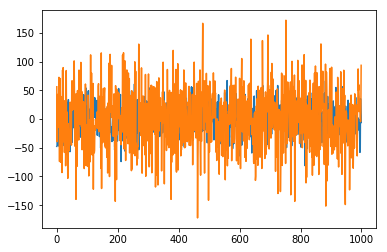

In [59]:
#Масштабированные центрированные данные
plt.plot(X_scaled)

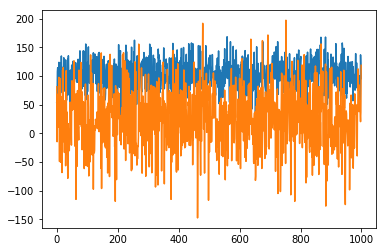

In [60]:
#Масштабированные данные
plt.plot(X_scaled1)

Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

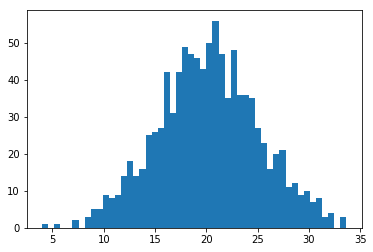

In [61]:
plt.hist(x,50)
plt.show()
#графики одинаковые

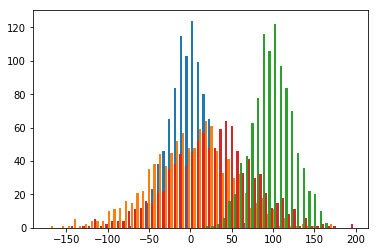

In [62]:
plt.hist(X_scaled,50) #плотность распределения центрированной и масштабированной выборки x и y.
plt.hist(X_scaled1,50) #плотность распределения масштабированной выборки x и y.
plt.show()
#График плотности распределения масштабированной выборки смещен и расширен по оси x и вытянут по оси y относительно исходных данных, 
#плотность стала более разреженной, так как неизменное число точек теперь расположено на большей площади. 

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? ? 0?

0.032450435353359966


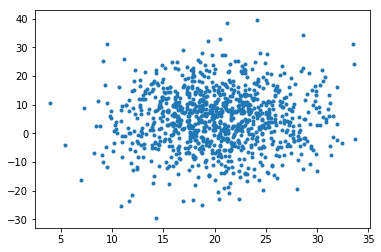

In [63]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)
#Значение коэффициента 0.01017503536923314 близко к 0, что говорит об очень слабой положительной корреляции
#0 ознаяает отсутсвие линейной взаимосвязи между переменными
#Положительное близкое к 1 значение коэффициента Пирсона говорит о наличии прямой линейной взаимосвязи между переменными
#Отрицательное близкое к -1 значение коэффициента Пирсона говорит о наличии обратной линейной взаимосвязи между переменными

Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

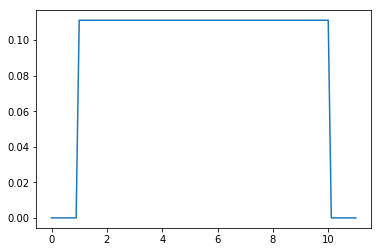

In [64]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 11, 100) # 100 чисел от 0 до 11 включительно
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

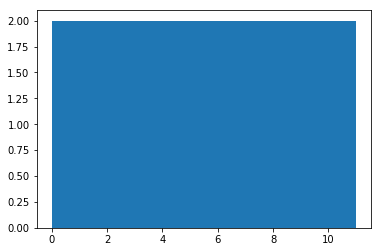

In [65]:
plt.hist(x,50)
plt.show()
#У равномерного распределения плотность вероятности на интервале значений постоянна.

Найти на графике примеры выброса. Что они означают?
https://github.com/yustiks/statistics_in_python/blob/master/dz.ipynb

На графике однозначно определяется 4 выброса с приблизительными координатами: 
* [0, 95] - данные по x отсутствуют (или заведены в базу некорректно). По y все в пределах выборки.
* [40, 82] - неполные данные по x. По y все в пределах выборки.
* [79, 0]  - данные по y отсутствуют (или заведены в базу некорректно). По x все в пределах выборки.
* [82, 10] - неполные данные по y. По x все в пределах выборки. 
Выбросы необходимо проверять, так как они искажают статистику, но могут возникать не только из-за ошибки (например, сборы фильма "Аватар").

Найти корелляцию в следующих данных: 
Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [66]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [67]:
import seaborn as sns

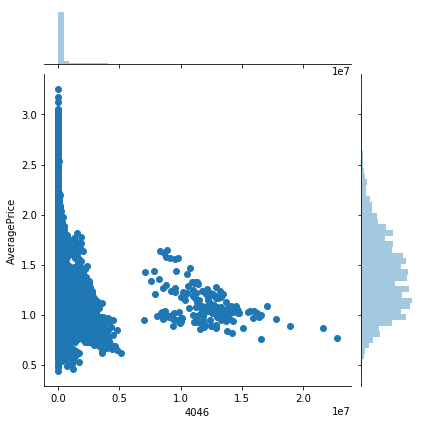

In [68]:
sns.jointplot(x='4046', y='AveragePrice', 
              data=df, kind='scatter')

In [69]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [70]:
Total_number  = df_norm[0]
Average_Price = df_norm[1]

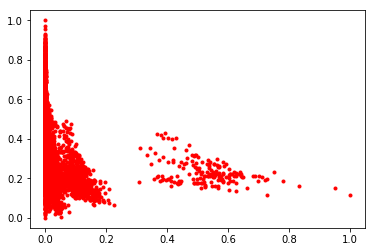

In [71]:
plt.plot(Total_number, Average_Price, 'r.')
#На графике видны две области по количеству покупок авокадо, можно каждую из них вынести на отдельный график

In [72]:
Total_number1  = df_norm[ df_norm[0] < 0.2 ][0]
Average_Price1 = df_norm[ df_norm[0] < 0.2 ][1]

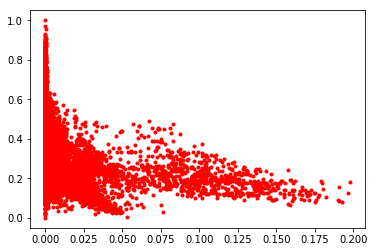

In [73]:
plt.plot(Total_number1, Average_Price1, 'r.')
#графики подтверждают наличие зависимости между средней ценой и количеством авокадо: чем ниже цена, тем больше авокадо продается.

In [74]:
Total_number2  = df_norm[ df_norm[0] > 0.2 ][0]
Average_Price2 = df_norm[ df_norm[0] > 0.2 ][1]

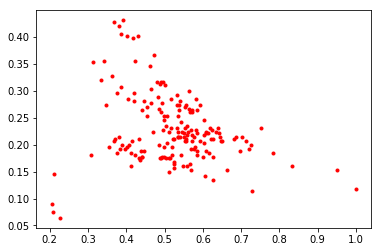

In [75]:
plt.plot(Total_number2, Average_Price2, 'r.')